In [40]:
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с матрицами
import sklearn # машинное обучение на python
import seaborn as sns # рисовать много что

from scipy import stats

import statsmodels.api as sm

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Tree Imports
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Ensemble Imports
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection

In [3]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# загружаем данные
data = pd.read_csv("Cellphone.csv")
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [7]:
# кол переменные 

df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [12]:
# вместо множества отдельных стат. тестов для проверки связи можно запустить кор матрицу потому что все переменные из датасета количественные 
# нет никакого смысла делать отдельные т-тесты для проверки ассоциации между переменными

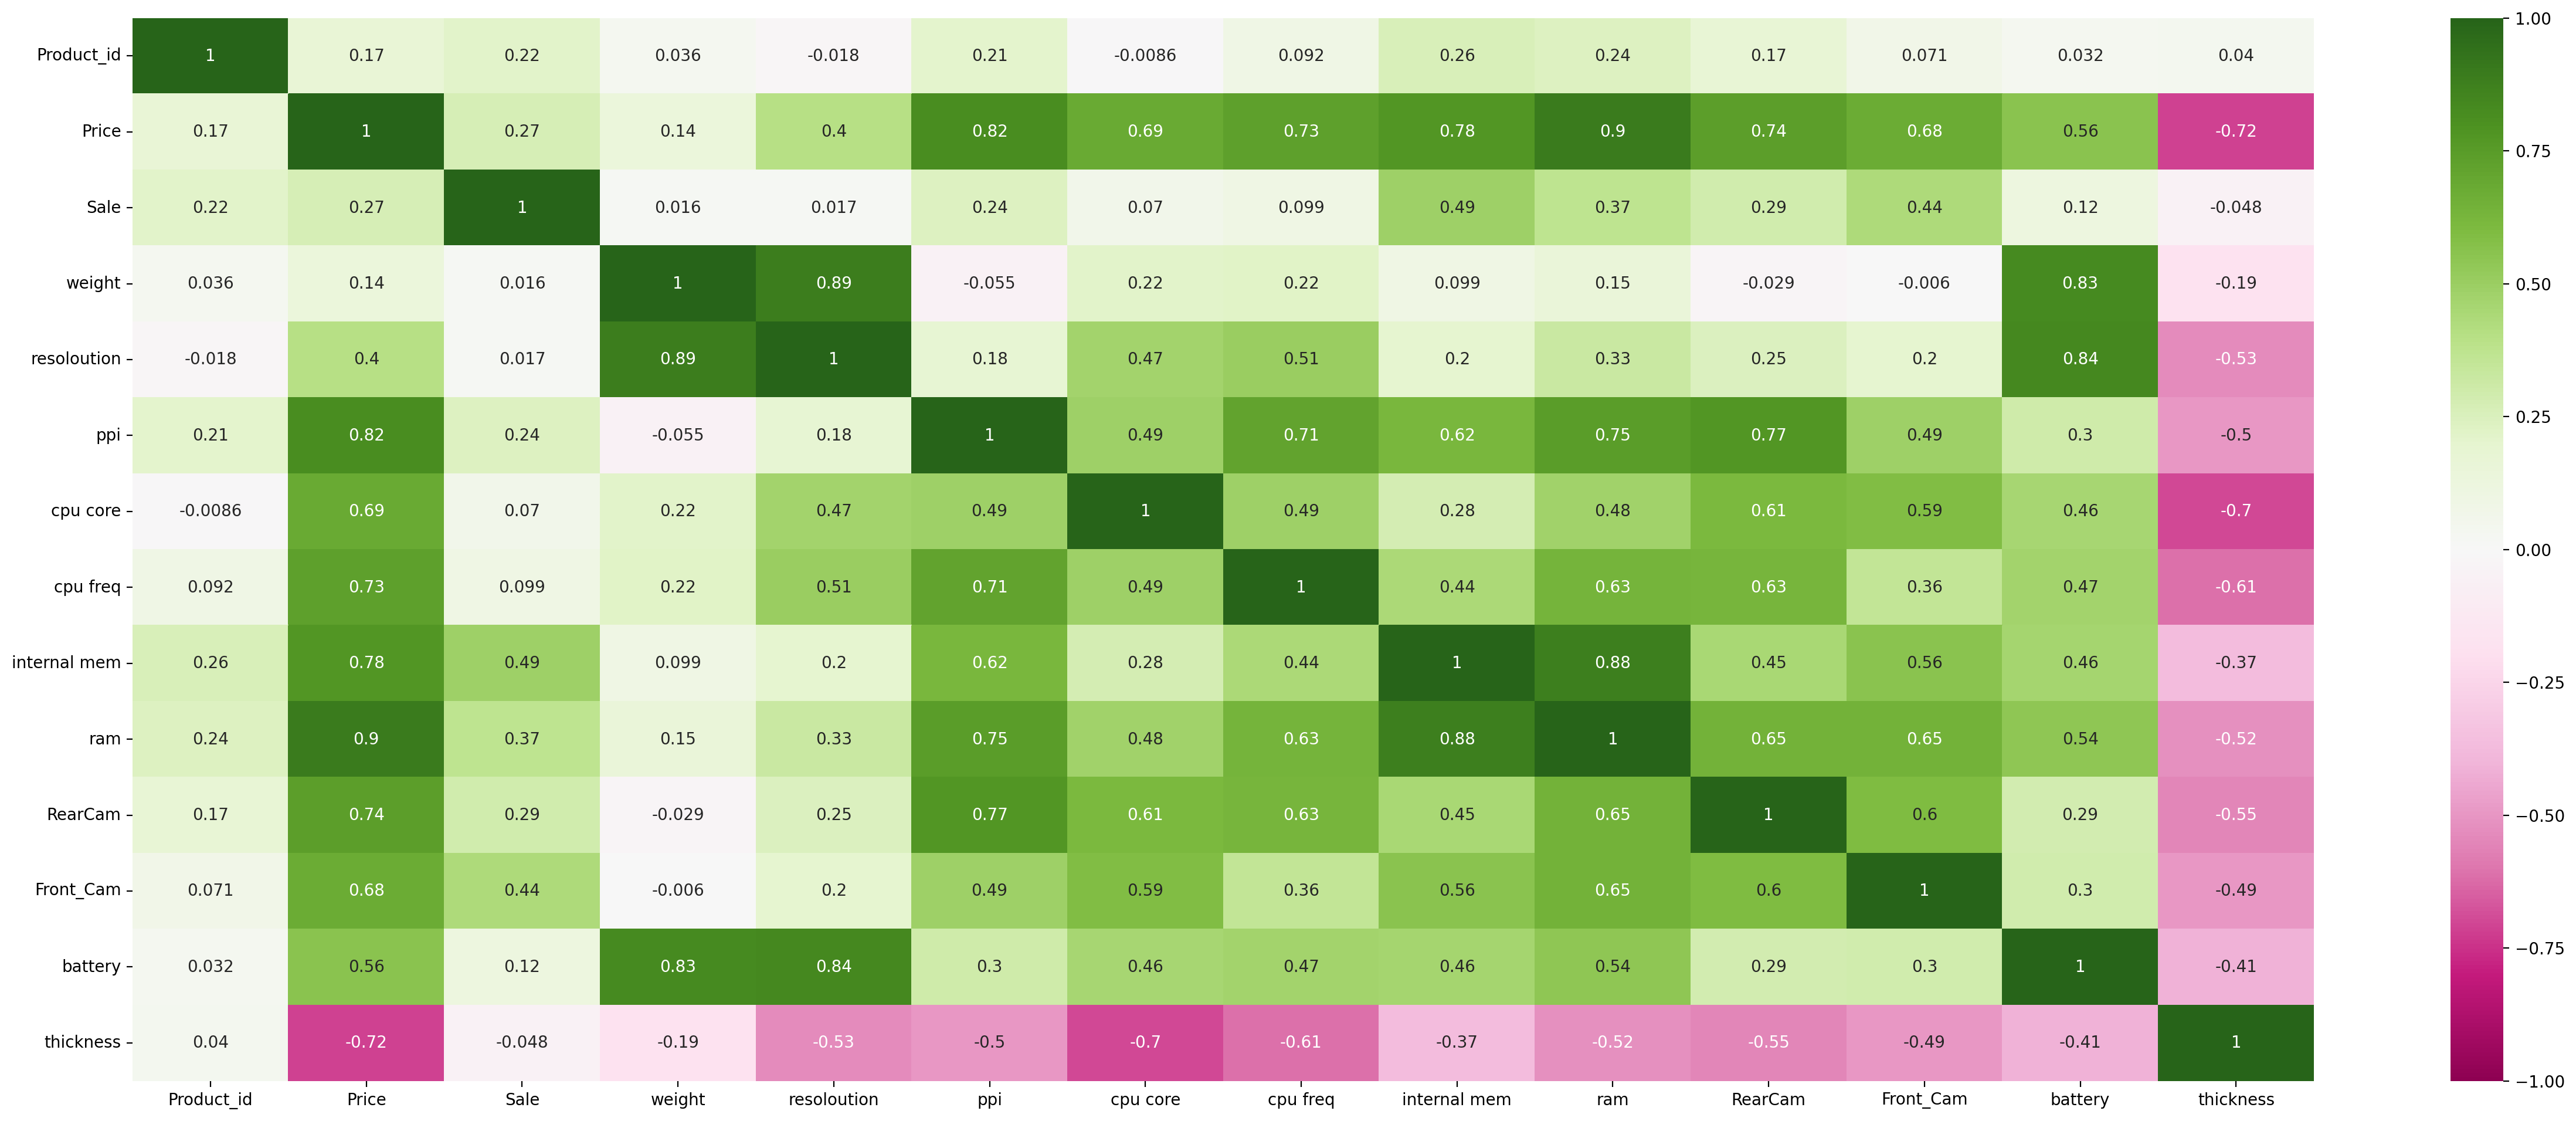

In [9]:
import seaborn as sns

plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [ ]:
# нас интересует строчка с price - ауткамом. 
# Видим, что наиболее крутые переменные связанные с памятью устройства (ram, mem), производительностью (cpu core, cpu freq) а также с внешними характеристиками - камерой (RearCam, Front_Cam)
# и размером экранов (ppi, resolution, thickness) и батареей (battery)

In [18]:
# время регрессий !
# для выполнения цели задачи а именно 

работая в data science, то есть в отрасли **науки** 
стоит поступать научно и также учитывать предыдущие исследование в теме. Так я нашел статью, где 

Размер (resolution), характеристики центрального процесса (CPU frequency & core) были указаны в статье по кластеризации факторов для смартфонов как влиятельные факторы, поэтому я их беру с собой и в регрессию. Дополнительно я решил взять мегапиксели главной камеры, объем батареи и вес смартфона. 

стоит помнить, что если взять только самые коррелируемые переменные, мы рискуем с высокой долью вероятности получить мультиколлинеарность
которая ведет за собой...

уменьшение значений t-статистик для параметров, что приводит к неправильному выводу об их статистической значимости
получение неустойчивых оценок параметров модели и их дисперсий
возможность получения неверного с точки зрения теории знака у оценки параметра

кратко - к неточности при оценивании модели, что может сказаться на выбор модели 

мультиколлинеарность можно будет решить созданием гребневой регрессии

In [10]:
df_ml = df[["resoloution", "cpu core", "cpu freq", "ram", "RearCam", "battery", "thickness", "Price"]]
df_ml.columns = ["Resolution", "CPU_core", "CPU_freq", "RAM", "Camera", "Battery", "Thickness", "Price"]

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Resolution  161 non-null    float64
 1   CPU_core    161 non-null    int64  
 2   CPU_freq    161 non-null    float64
 3   RAM         161 non-null    float64
 4   Camera      161 non-null    float64
 5   Battery     161 non-null    int64  
 6   Thickness   161 non-null    float64
 7   Price       161 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.2 KB


Делаем "костыль" - приписываем значение "names" колонкам, чтобы потом eli5 смог их распознать в будущих моделях ML. Проблема в том, что если через функцию explain_weights_df(название модели, feature_names=names[0:7]) вместо names подставить фактическое значение колонок через "df_ml.columns", оно работать не будет (по неизвестным причинам). В итоге я даю значение names, которое взял из классной работы.

In [11]:
df_ml = df_ml[["Resolution", "CPU_core", "CPU_freq", "RAM", "Camera", "Battery", "Thickness", "Price"]]
names = ["Resolution", "CPU_core", "CPU_freq", "RAM", "Camera", "Battery", "Thickness", "Price"]

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Resolution  161 non-null    float64
 1   CPU_core    161 non-null    int64  
 2   CPU_freq    161 non-null    float64
 3   RAM         161 non-null    float64
 4   Camera      161 non-null    float64
 5   Battery     161 non-null    int64  
 6   Thickness   161 non-null    float64
 7   Price       161 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 10.2 KB


In [13]:
y = df_ml.Price
X = df_ml.drop(columns = "Price")
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     312.8
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.05e-87
Time:                        16:05:42   Log-Likelihood:                -1078.0
No. Observations:                 161   AIC:                             2172.
Df Residuals:                     153   BIC:                             2197.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2201.2221    193.065     11.401      0.000    1819.806    2582.639
Resolution  -146.7000     25.701     -5.708      0.000    -197.474     -95.926
CPU_core      50.4813     10.304      4.899      0.000      30.126      70.837
CPU_freq     190.0898     42.017      4.524      0.000     107.080     273.099
RAM          231.4602     18.015     12.848      0.000     195.869     267.051
Camera        11.0242      4.128      2.671      0.008       2.869      19.179
Battery        0.1492      0.029      5.177      0.000       0.092       0.206
Thickness    -89.7682     12.376     -7.253      0.000    -114.218     -65.318
==============================================================================
Omnibus:                        3.075   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.594
Skew:                          -0.268   Prob(JB):                        0.273
Kurtosis:                       3.316   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Давайте проинтерпретируем, хоть это и не обязательно
Не смотря на то что мы выбрали переменную с большим количеством предикторов, только возраст (Age) имеет p-value < 0.05 => коэфициент действительно является значимым в нашем уравнении. Adj. R-squared = 0.095, значит модель отвечает только за 9.5% вариаций в ауткаме. 

Итого predicted Spending Score = 73.93 - 0.6 * Age (с каждым годом в среднем на 0.6 spending score у посетителей торгового центра уменьшается)

Показатели Omnibus (идеально - ближе к 0) и prob(omnibus) (идеально - ближе к 1) говорят нам о том, что данные ОЧЕНЬ далеки от нормальности. Это говорит о том, что нелинейный подход сработает лучше, чем линейный

Skew (лучше к 0) показывает, что остатки распределены не супер нормально, но и не прям плохо.

Durbin-Watson сигнализирует, что в нашей регрессии может встретится гетероскедастичность 

Condition Number значительно большее 30 указывает на еще одну проблему в модели - а именно, мультиколлинеарность. 

Уже без построения графиков понятно, что модель далека от идеала и я бы не рекомендовал использовать ее в каком-нибудь серьёзном анализе и уж тем более делать из нее далеко идущие выводы. Однако в отсутствии альтернатив, я отвечаю на поставленную задачу (какие конкретно характеристики клиентов ведут к большему Spending Score - и большей выгоде для владельца ТЦ). И согласно этой модели, чем моложе клиенты, чем больше Spending Score и тем больше выгоды мы получим ориентируясь на подобных людей



In [14]:
y = df_ml.Price
X = df_ml.drop(columns = "Price")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 282)

In [15]:
# линейная регрессионная модель 
reg = LinearRegression()

reg.fit(X_train, y_train)
reg.score(X_train,y_train), reg.score(X_test,y_test)

(0.9276326107118615, 0.9406960040328571)

In [19]:
#RMSE

reg_y_pred = reg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, reg_y_pred))

203.4525343516617

In [20]:
regCV = LinearRegression()
cv_results = cross_val_score(regCV, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
cv_results

array([-42408.08302321, -74435.39963575, -42456.49669929, -93238.55518048,
       -10687.99253645, -39254.45616229, -68289.53699296, -41766.02419021,
       -30107.91640486, -31732.34250915])

In [21]:
np.std(cv_results)/np.mean(cv_results)

-0.48567799079895924

In [47]:
# дерево

tree_1 = tree.DecisionTreeRegressor()
tree_1.fit(X_train,y_train)
tree_1.score(X_train, y_train), tree_1.score(X_test, y_test)

(1.0, 0.9479248506161801)

In [30]:
#RMSE

tr_pred_1 = tree_1.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, tr_pred_1))

289.20164693962687

In [46]:
tree_2 = tree.DecisionTreeRegressor(max_depth = 4, min_samples_leaf=10)
tree_2.fit(X_train,y_train)
tree_2.score(X_train, y_train), tree_2.score(X_test, y_test)

(0.847161934447751, 0.8193636518547966)

In [34]:
# RMSE 
tr_pred = tree_2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, tr_pred))

355.077944933874

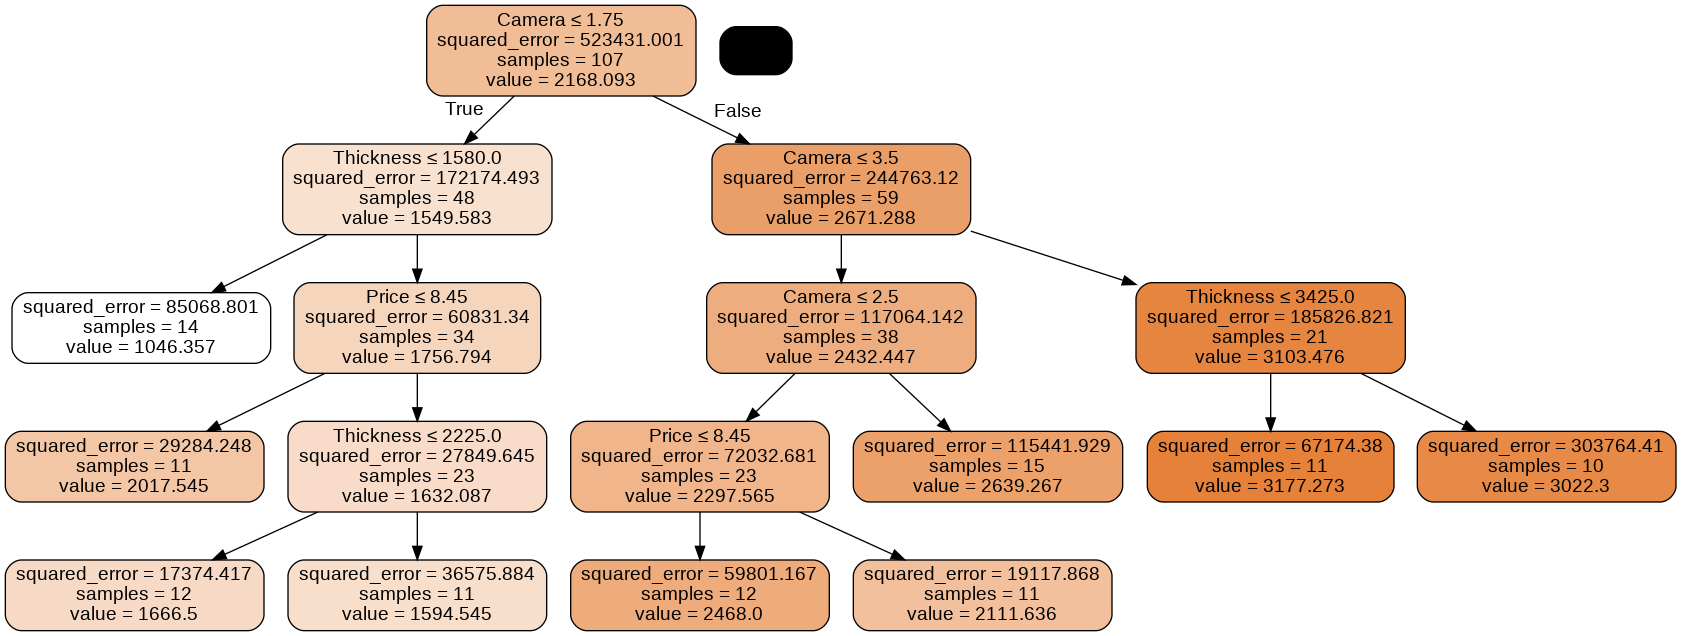

In [36]:
dot_data = StringIO()
export_graphviz(tree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = df_ml.columns[1:])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [57]:
# частный случай бустинга: адабуст

model_ada = AdaBoostRegressor(base_estimator=reg, random_state = 282, n_estimators = 50)
model_ada.fit(X_train, y_train)
model_ada.score(X_train, y_train), model_ada.score(X_test, y_test)

(0.9302046806151787, 0.9363084905604797)

In [39]:
tr_pred_ada = model_ada.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, tr_pred_ada))

210.84431520735052

In [54]:
ada_CV = AdaBoostRegressor()
cv_results_ada = cross_val_score(ada_CV, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
cv_results_ada

np.std(cv_results_ada)/np.mean(cv_results_ada)

-0.8416453718466977

In [41]:
# ансамбль методом бэггинга из регрессий
model_bag = BaggingRegressor(base_estimator = reg, n_estimators = 50, random_state = 282)
model_bag.fit(X_train, y_train)
model_bag.score(X_train, y_train), model_bag.score(X_test, y_test)

(0.9273259681652303, 0.9384285804181787)

In [43]:
tr_pred_ada = model_bag.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, tr_pred_ada))

207.305444734

In [53]:
bag_CV = BaggingRegressor()
cv_results_bag = cross_val_score(bag_CV, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
cv_results_bag

np.std(cv_results_bag)/np.mean(cv_results_bag)

-1.0398329171655936

In [42]:
# random forest справился хуже, как и остальные ансамбли, которые я пробовал в дневниках
# нам не нужно интепрететировать ансамбли и смотреть на каждый важный показатель, нам нужна общая цена

(0.8450053327842174, 0.8315328918454771)